In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imutils


## Image Segmentation using Thresholding
Thresholding is used to create a binary image from a grayscale image.
It is the simplest way to segment objects from a background.

#### local vs global
If the image background is relatively uniform, then you can use a global threshold value (above mean or based on histogram). However, if there is large variation in the background intensity, adaptive thresholding (a.k.a. local or dynamic thresholding) may produce better results. Note that local is much slower than global thresholding

In [2]:
from skimage.filters import threshold_otsu # local algorithm


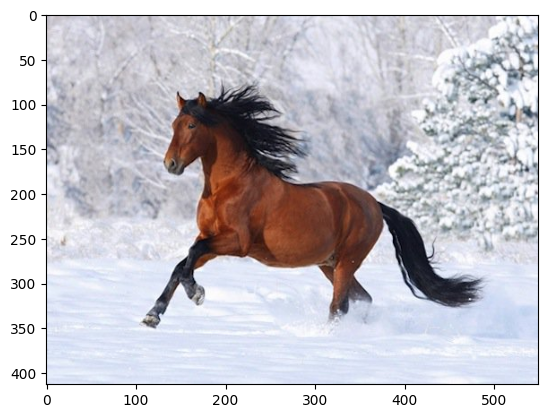

In [3]:
img = cv2.imread("horse.jpg")
plt.imshow(imutils.opencv2matplotlib(img))
plt.show()

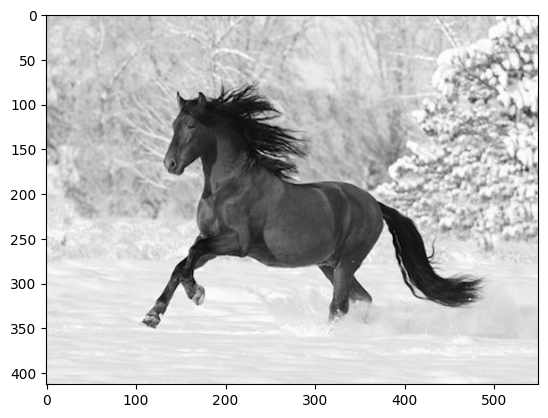

In [4]:
"""
Preprocessing the Image
Convert the image to grayscale
"""
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(imutils.opencv2matplotlib(gray))
plt.show()

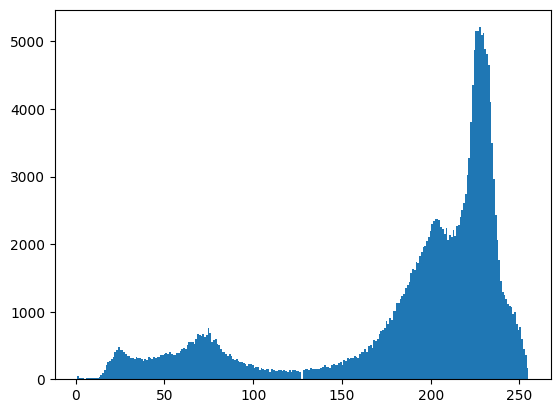

In [5]:
plt.hist(gray.ravel(), bins=256)
plt.show()

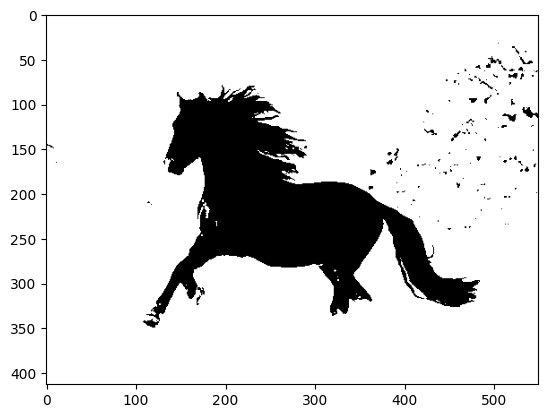

In [6]:

thresh = 125
binary = gray > thresh
plt.imshow(binary,cmap=plt.cm.gray)
plt.show()

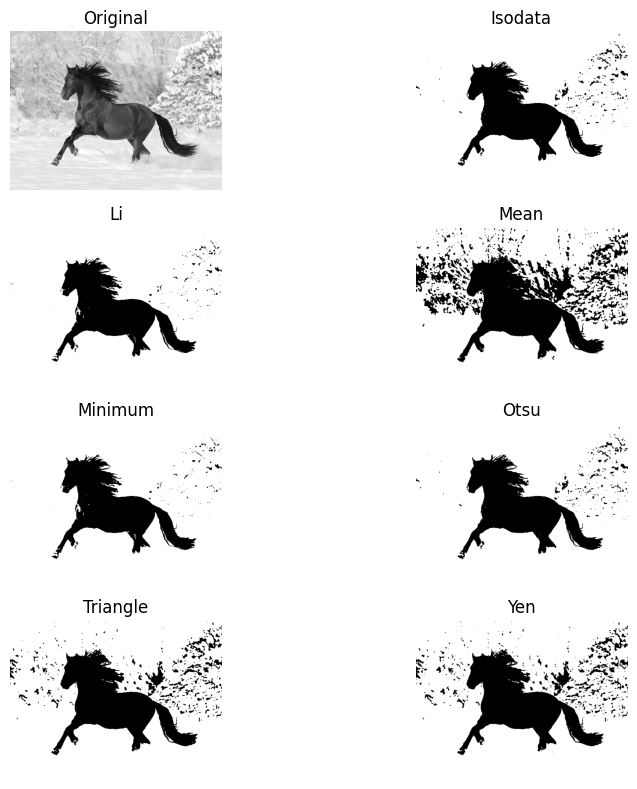

In [7]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(gray, figsize=(10, 8), verbose=False)
plt.show()

In [8]:
from skimage.filters import threshold_minimum

thresh = threshold_minimum(gray)
binary = gray < thresh

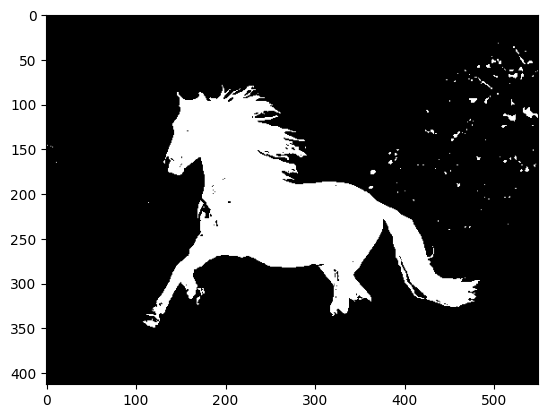

In [9]:
plt.imshow(binary,cmap=plt.cm.gray)
plt.show()

In [10]:
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

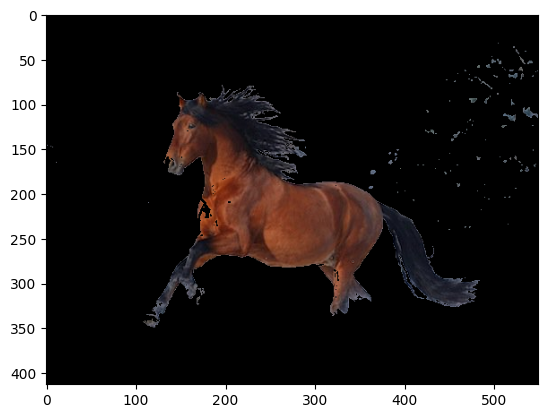

In [11]:
filtered = filter_image(img, binary)
plt.imshow(imutils.opencv2matplotlib(filtered))
plt.show()

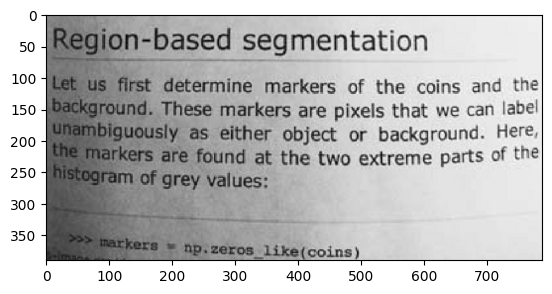

In [12]:
# Local
img = cv2.imread("text.png")
plt.imshow(imutils.opencv2matplotlib(img))
plt.show()

In [13]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

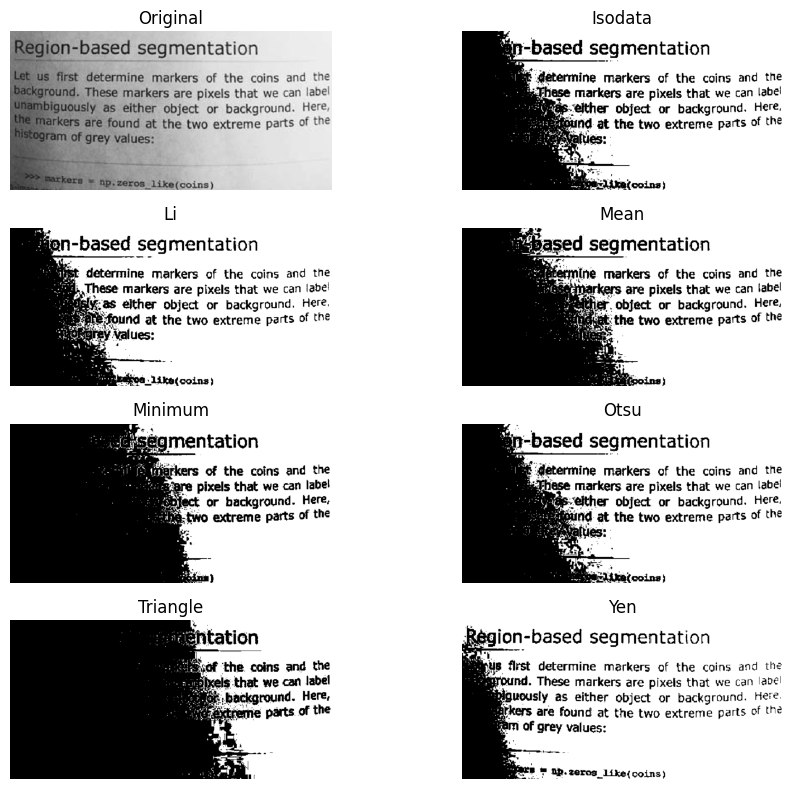

In [14]:
fig, ax = try_all_threshold(gray, figsize=(10, 8), verbose=False)
plt.show()

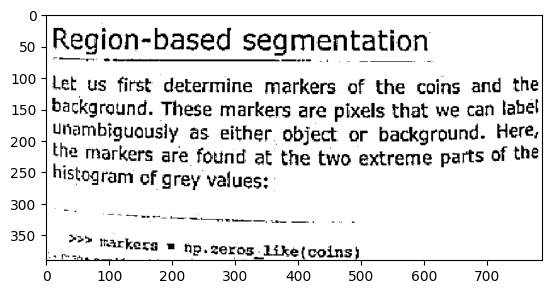

In [15]:
# Local
from skimage.filters import threshold_local
block_size = 25
local_thresh = threshold_local(gray, block_size,offset=15)
binary_local = gray > local_thresh
plt.imshow(binary_local,cmap=plt.cm.gray)
plt.show()

### Image Segmentation using Contour Detection


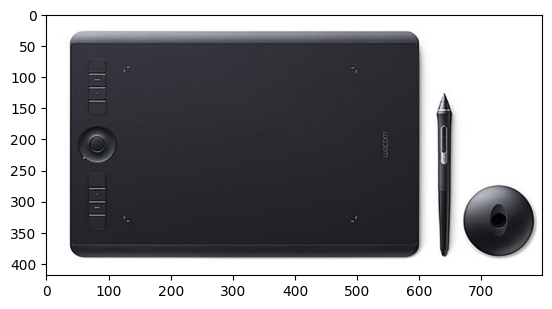

In [16]:
img = cv2.imread("mobile.jpg")
plt.imshow(imutils.opencv2matplotlib(img))
plt.show()

In [17]:
# Convert the image to grayscale.
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

# Compute the threshold of the grayscale image and get the binary image
thresh,binary = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_OTSU)
print(thresh)

# Apply canny edge detection to the thresholded image 
edges=cv2.Canny(binary,0,250)

# dilate the detected edges 
edges = cv2.dilate(edges,None)

147.0


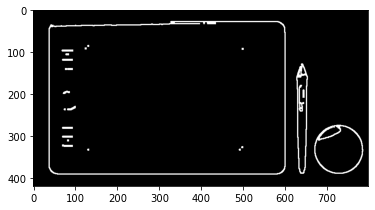

In [376]:
plt.imshow(imutils.opencv2matplotlib(edges))
plt.show()

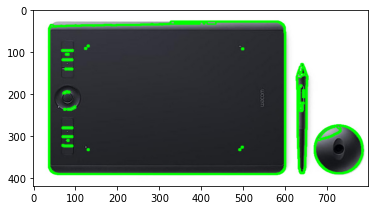

In [381]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
# Each contour is stored as a vector of points
contours = cv2.findContours(image=edges, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)[0]
                                     
# draw contours on the original image
image_copy = img.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
plt.imshow(imutils.opencv2matplotlib(image_copy))
plt.show()




In [396]:
# sort based on the contour area to get the largest contour
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0], key=cv2.contourArea)
# let us pick the largest contour
largest=[cnt[-1]]
mask = np.zeros(gray.shape, np.uint8)
# we will utilize the thickness-parameter
# If it is negative, the interiors of the contour are filled with the colour specified (255 for 1)
masked = cv2.drawContours(mask,largest,-1, 255, -1)

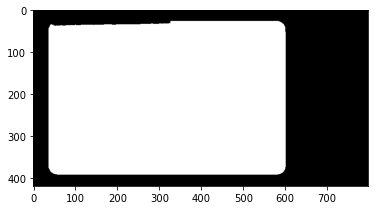

In [397]:
plt.imshow(imutils.opencv2matplotlib(masked))
plt.show()

In [398]:
dst = cv2.bitwise_and(gray, gray, mask=masked)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

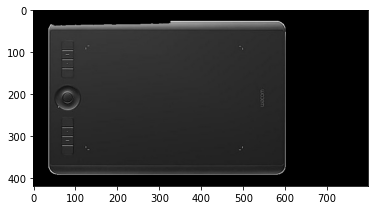

In [399]:
plt.imshow(imutils.opencv2matplotlib(segmented))
plt.show()

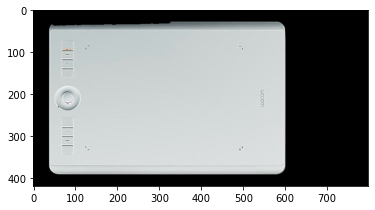

In [404]:
# OR
filtered = filter_image(img, masked)
plt.imshow(filtered)
plt.show()

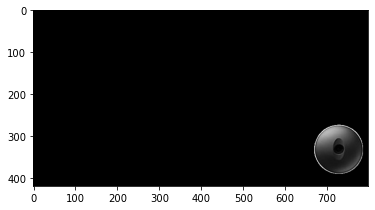

In [238]:
mask = np.zeros(gray.shape, np.uint8)
masked = cv2.drawContours(mask, [cnt[-3]],-1, 255, -1)
dst = cv2.bitwise_and(gray, gray, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(imutils.opencv2matplotlib(segmented))
plt.show()

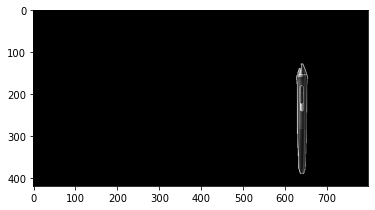

In [240]:
mask = np.zeros(gray.shape, np.uint8)
masked = cv2.drawContours(mask, [cnt[-5]],-1, 255, -1)
dst = cv2.bitwise_and(gray, gray, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(imutils.opencv2matplotlib(segmented))
plt.show()

## Image segmentation using Kmeans

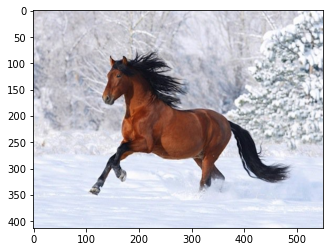

In [405]:
img = cv2.imread("horse.jpg")
plt.imshow(imutils.opencv2matplotlib(img))
plt.show()

In [406]:
# convert the image to RGB format
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
# -1 means unknown dimension and we want numpy to figure it out but I need three columns
twoDimage = img.reshape((-1,3))

# convert it into the float datatype.
twoDimage = np.float32(twoDimage)

In [415]:
# Defining Parameters
max_itr=30
eps= 0.5
K = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,max_itr , eps)
attempts=20 #Flag to specify the number of times the algorithm is executed using different initial labeling. 
            # The algorithm returns the labels that yield the best compactness. This compactness is returned as output.

In [416]:
# Applying K-Means
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
# convert back to 8 bit
center = np.uint8(center)
# flatten the labels array 
# and convert all pixels to the color of the centroids
res = center[label.flatten()]
#reshape back to the original image dimension
result_image = res.reshape((img.shape))

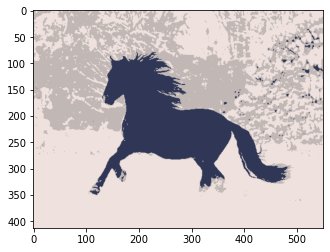

In [417]:
plt.imshow(imutils.opencv2matplotlib(result_image))
plt.show()

### Disabling some clusters to visualize the segment they represented.


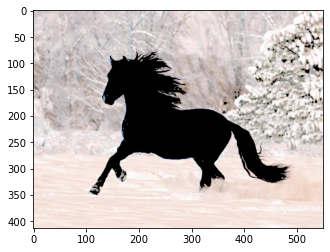

In [411]:
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1,3))
# choosing the cluster to disable
cluster=1
# making the disabeled cluster black
masked_image[label.flatten()==cluster]=[0,0,0]
result_image = masked_image.reshape((img.shape))
plt.imshow(imutils.opencv2matplotlib(result_image))
plt.show()